**STUDENT GRADE PREDICTION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {
 "hours": [2,3,5,1,4,6,5,7,8,2],
 "attendance": [60,70,80,50,75,90,85,95,98,65],
 "previous": [50,55,65,40,60,70,68,80,85,52],
 "final": [55,60,70,45,65,75,72,85,90,58]
}

df = pd.DataFrame(data)
df

,hours,attendance,previous,final
0,2,60,50,55
1,3,70,55,60
2,5,80,65,70
3,1,50,40,45
4,4,75,60,65
5,6,90,70,75
6,5,85,68,72
7,7,95,80,85
8,8,98,85,90
9,2,65,52,58


In [3]:
df.describe()

,hours,attendance,previous,final
count,10.000000,10.000000,10.000000,10.000000
mean,4.300000,76.800000,62.500000,67.500000
std,2.311805,15.711284,13.906433,13.786064
min,1.000000,50.000000,40.000000,45.000000
25%,2.250000,66.250000,52.750000,58.500000
50%,4.500000,77.500000,62.500000,67.500000
75%,5.750000,88.750000,69.500000,74.250000
max,8.000000,98.000000,85.000000,90.000000


**NOW WE JUMP INTO THE PREDICTION PART**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X = df[["hours","attendance","previous"]]
y = df["final"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [9]:
model.predict([[5,80,65]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([69.54789047])

In [11]:
new_student = pd.DataFrame(
    [[4,90,70]],
    columns=["hours","attendance","previous"]
)

model.predict(new_student)


array([75.45375485])

**MORE STUDY = BETTER MARKS**

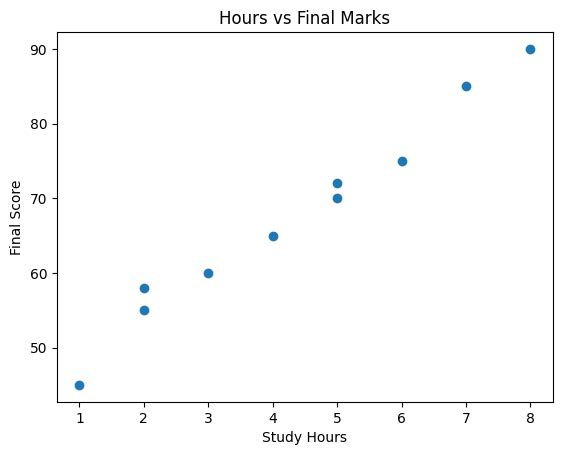

In [12]:
import matplotlib.pyplot as plt

plt.scatter(df["hours"], df["final"])
plt.xlabel("Study Hours")
plt.ylabel("Final Score")
plt.title("Hours vs Final Marks")
plt.show()


**2) Compare REAL vs PREDICTED**

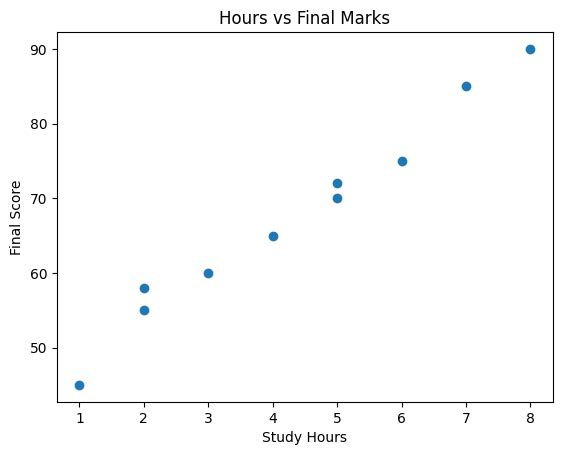

In [13]:
import matplotlib.pyplot as plt

plt.scatter(df["hours"], df["final"])
plt.xlabel("Study Hours")
plt.ylabel("Final Score")
plt.title("Hours vs Final Marks")
plt.show()


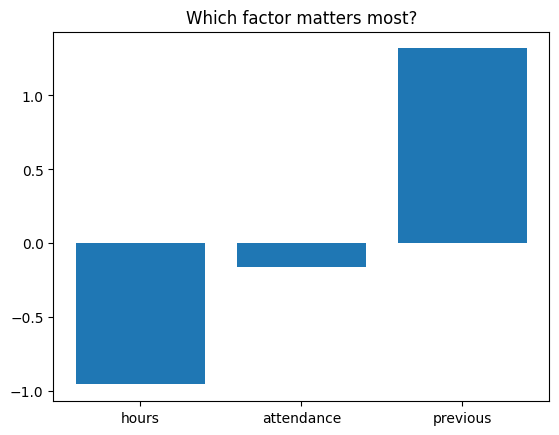

In [14]:
importance = model.coef_

plt.bar(["hours","attendance","previous"], importance)
plt.title("Which factor matters most?")
plt.show()


**MODEL ACCURACY**

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

pred = model.predict(x_test)
print("MSE:", mean_squared_error(y_test, pred))
print("R2 Score:", r2_score(y_test, pred))

MSE: 1.4906299981902773
R2 Score: 0.9850937000180973
